# 1) Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import re

from collections import Counter

# Plotting Libs
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D

# Statistical libs
import scipy
from scipy import stats
from scipy.stats import norm, skew, chi2_contingency, chi2, chisquare
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pymannkendall as mk

# Model libs 
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV 
import sklearn.model_selection as skm

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import (plot_tree, export_text)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from ISLP.bart import BART

# Model Selection Libs
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector

# Accuracy Libs
from sklearn.model_selection import train_test_split
from ISLP.svm import plot as plot_svm
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay

# 2) Preperation df0

## Load Data

In [2]:
pd.set_option('display.max_columns', None)
df0 = pd.read_pickle("df0.pkl")
df = pd.read_pickle("df_all.pkl")

In [117]:
df0.shape[0] # Number of rows

2304

In [3]:
df0

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Other Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Design,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Enrollment_Categ,Study_Documents,Document_Counts,Study_Doc_Bin,Start_Date_Year,First_Posted_Year,Results_First_Posted_Year,Last_Update_Posted_Year,Primary_Completion_Date_Year,Completion_Date_Year,Start_Date_Month,First_Posted_Month,Results_First_Posted_Month,Last_Update_Posted_Month,Primary_Completion_Date_Month,Completion_Date_Month,Completion_Gap,Comp_Prim_Gap,Start_Gap,End_Gap,Start_Date_Year_Categ,First_Posted_Year_Categ,Results_First_Posted_Year_Categ,Last_Update_Posted_Year_Categ,Primary_Completion_Date_Year_Categ,Completion_Date_Year_Categ,End_Gap_Categ,Intervention_Type,Intervention_Counts,Intervention_Sub,Placebo,Standard_Care,Allocation,Intervention_Model,Masking_Detail,Masking,Primary_Purpose,Outcomes,Outcomes_List,Outcomes_Counts,Outcome_Bin,Capital_Cities,Capital_Counts,Capital,Countries,Country_Counts,Continents,Continent_Counts,Capital_Counts_Categ,Healthy
0,NCT03099980,Exploratory Trial Evaluating Cosentyx (Secukin...,COMPLETED,This is a pilot study in which the the safety ...,NO,Hidradenitis Suppurativa,BIOLOGICAL: secukinumab,Hidradenitis Suppurativa Clinical Response (Hi...,No Outcome Measure,No Outcome Measure,Tufts Medical Center,No collaborators,ALL,"[ADULT, OLDER_ADULT]",PHASE0,20.0,OTHER,Allocation: NA|Intervention Model: SINGLE_GROU...,2016-07,2018-12,2019-01,2017-04,NaT,2019-06,"Tufts Medical Center, Department of Dermatolog...","(-0.001, 21.0]",[No Documents],0,No,2016,2017,NaN,2019,2018,2019,7,4,NaN,6,12,1,30,0,-9,5,"(2010, 2018]","(2004, 2018]",NaN,"(2018, 2025]","(2010, 2018]","(2018, 2024]","(-108.001, 9.0]",[BIOLOGICAL],1,secukinumab,No Placebo,No SOC,RANDOMIZED,SINGLE_GROUP,[NONE],NONE,TREATMENT,No Outcome Measures,[No Outcome Measures],0,No,[No Capital],0,No Capital,"[United States, Massachusetts]",2,[North America],1,"(-0.001, 1.0]",Condition
1,NCT02628080,Atovaquone as Tumour HypOxia Modifier,COMPLETED,Solid tumours often have highly disorganised v...,NO,"Carcinoma, Non-Small-Cell Lung",DRUG: Atovaquone,Percentage change in reduction of hypoxia by a...,"Reduction of perfusion by atovaquone, Changes ...",Correlation of hypoxia modification with PK (p...,University of Oxford,No collaborators,ALL,"[ADULT, OLDER_ADULT]",PHASE0,46.0,OTHER,Allocation: NON_RANDOMIZED|Intervention Model:...,2016-05,2018-10,2018-12,2015-12,NaT,2019-09,"Churchill Hospital, Oxford, Oxfordshire, OX3 7...","(21.0, 50.0]",[No Documents],0,No,2016,2015,NaN,2019,2018,2018,5,12,NaN,9,10,12,31,2,5,9,"(2010, 2018]","(2004, 2018]",NaN,"(2018, 2025]","(2010, 2018]","(2010, 2018]","(-108.001, 9.0]",[DRUG],1,Atovaquone,No Placebo,No SOC,NON_RANDOMIZED,PARALLEL,[NONE],NONE,TREATMENT,Primary + Secondary + Other,"[Primary, Secondary, Other]",3,Yes,[No Capital],0,No Capital,[United Kingdom],1,[Europe],1,"(-0.001, 1.0]",Condition
2,NCT02370862,Transdermal Administration of a Prokinetic Age...,COMPLETED,Bowel care (BC) is a time-consuming and cumber...,NO,Spinal Cord Injury|Neurogenic Bowel,DRUG: Neostigmine and Glycopyrrolate,Biological Responses to Study Drugs (quantifie...,Safety of Study Medication (quantified through...,No Outcome Measure,James J. Peters Veterans Affairs Medical Center,No collaborators,ALL,"[ADULT, OLDER_ADULT]",PHASE0,28.0,GOV,Allocation: NA|Intervention Model: SINGLE_GROU...,2013-02,2016-12,2016-12,2015-02,NaT,2017-03,"James J. Peters VA Medical Center, Bronx, New ...","(21.0, 50.0]",[No Documents],0,No,2013,2015,NaN,2017,2016,2016,2,2,NaN,3,12,12,46,0,-24,3,"(2010, 2018]","(2004, 2018]",NaN,"(2009, 2018]","(2010, 2018]","(2010, 2018]","(-108.001, 9.0]",[DRUG],1,Neostigmine and Glycopyrrolate,No Placebo,No SOC,NOT_APPLICABLE,SINGLE_GROUP,[NONE],NONE,TREATMENT,Primary

## Drop Columns

In [118]:
def drop_fun(dfi, cols):
    for col in cols:
      dfi = dfi.drop([col] , axis=1)  
    
    return dfi

In [119]:
cols = [
       'NCT Number', 'Study Title', 'Brief Summary', 'Conditions',
       'Study Results', 'Enrollment', 'Study Design', 
       'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 
       'Locations', 'Interventions', 'Intervention_Sub', 
       'Study_Documents', 'Document_Counts', 'Study_Doc_Bin', 
       'Start_Date_Year', 'First_Posted_Year', 'Results_First_Posted_Year',
       'Last_Update_Posted_Year', 'Primary_Completion_Date_Year', 'Completion_Date_Year', 
       'First_Posted_Year_Categ', 'Results_First_Posted_Year_Categ', 'Last_Update_Posted_Year_Categ', 'Primary_Completion_Date_Year_Categ', 
       'Start_Date_Month', 'First_Posted_Month',
       'Results_First_Posted_Month', 'Last_Update_Posted_Month',
       'Primary_Completion_Date_Month', 'Completion_Date_Month',
       'Comp_Prim_Gap', 'Start_Gap', 'End_Gap',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Other Outcome Measures',
       'Sponsor', 'Collaborators',
       'Outcomes', 'Outcomes_Counts', 'Capital_Cities', 'Outcome_Bin',
       'Capital_Counts', 'Capital', 'Countries', 
       'Capital_Counts_Categ', "Phases", "Masking_Detail" # Drop "Phases", as we have only a specific Phase per dfi.
       ]

df0 = drop_fun(df0, cols)

In [120]:
df0.columns.values # Check the columns of df0

array(['Study Status', 'Sex', 'Age', 'Funder Type', 'Enrollment_Categ',
       'Study_Doc_Categ', 'Completion_Gap', 'Start_Date_Year_Categ',
       'Completion_Date_Year_Categ', 'End_Gap_Categ', 'Intervention_Type',
       'Intervention_Counts', 'Placebo', 'Standard_Care', 'Allocation',
       'Intervention_Model', 'Masking', 'Primary_Purpose',
       'Outcomes_List', 'Country_Counts', 'Continents',
       'Continent_Counts', 'Healthy'], dtype=object)

## Dummy Variables

In [121]:
def explode(cols, dfi, i, t):   
    for col in cols: 
        dfi = dfi.explode(col)
        dfi[col] = pd.Categorical(dfi[col], ordered = t)
        dfi = dfi.reset_index(drop=True)
    return dfi


In [122]:
dummy_cols = ['Sex', 'Age', 'Funder Type', 'Enrollment_Categ',
       'Study_Doc_Categ', 'Start_Date_Year_Categ',
       'Completion_Date_Year_Categ', 'End_Gap_Categ', 'Intervention_Type',
       'Intervention_Counts', 'Placebo', 'Standard_Care', 'Allocation',
       'Intervention_Model', 'Masking', 'Primary_Purpose',
       'Outcomes_List', 'Continents',
       'Continent_Counts', 'Healthy']

df0 = explode(dummy_cols, df0, 0, True)

In [ ]:
def unused(cols , dfi, i):
    for col in cols:
        dfi[col] = dfi[col].cat.remove_unused_categories()
    return dfi

df0 = unused(dummy_cols, df0, 0)
df0.head(2)

,Study Status,Sex,Age,Funder Type,Enrollment_Categ,Study_Doc_Categ,Completion_Gap,Start_Date_Year_Categ,Completion_Date_Year_Categ,End_Gap_Categ,Intervention_Type,Intervention_Counts,Placebo,Standard_Care,Allocation,Intervention_Model,Masking,Primary_Purpose,Outcomes_List,Country_Counts,Continents,Continent_Counts,Healthy
0,COMPLETED,ALL,ADULT,OTHER,"(-0.001, 21.0]",No Documents,30,"(2010, 2018]","(2018, 2024]","(-108.001, 9.0]",BIOLOGICAL,1,No Placebo,No SOC,RANDOMIZED,SINGLE_GROUP,NONE,TREATMENT,No Outcome Measures,2,North America,1,Condition
1,COMPLETED,ALL,OLDER_ADULT,OTHER,"(-0.001, 21.0]",No Documents,30,"(2010, 2018]","(2018, 2024]","(-108.001, 9.0]",BIOLOGICAL,1,No Placebo,No SOC,RANDOMIZED,SINGLE_GROUP,NONE,TREATMENT,No Outcome Measures,2,North America,1,Condition


In [124]:
def dummies(cols, dfi):
    for col in cols:
            dfi = pd.get_dummies(data=dfi, columns=[col], drop_first = True, dtype=int, prefix_sep=' - ')
    return dfi


In [125]:
df0 = dummies(dummy_cols, df0)

In [126]:
df0.columns.values # Check the columns of df0

array(['Study Status', 'Completion_Gap', 'Country_Counts', 'Sex - FEMALE',
       'Sex - MALE', 'Age - CHILD', 'Age - OLDER_ADULT',
       'Funder Type - INDUSTRY', 'Funder Type - OTHER',
       'Enrollment_Categ - (21.0, 50.0]',
       'Enrollment_Categ - (50.0, 114.0]',
       'Enrollment_Categ - (114.0, 20121212.0]',
       'Study_Doc_Categ - Analysis Plan + Consent Form + Protocol',
       'Study_Doc_Categ - Analysis Plan + Protocol',
       'Study_Doc_Categ - Consent Form',
       'Study_Doc_Categ - Consent Form + Protocol',
       'Study_Doc_Categ - No Documents', 'Study_Doc_Categ - Protocol',
       'Start_Date_Year_Categ - (2018, 2024]',
       'Completion_Date_Year_Categ - (2018, 2024]',
       'End_Gap_Categ - (9.0, 166.0]', 'Intervention_Type - BIOLOGICAL',
       'Intervention_Type - COMBINATION_PRODUCT',
       'Intervention_Type - DEVICE',
       'Intervention_Type - DIAGNOSTIC_TEST',
       'Intervention_Type - DIETARY_SUPPLEMENT',
       'Intervention_Type - DRUG', 'Int

## Train-Test Split, Scale Data

In [75]:
def train_test(cont_cols, dfi):
    X = dfi.drop("Study Status", axis = 1)
    y = dfi["Study Status"]
    # Train-Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Scale Continuous X
    scaler = StandardScaler()
    X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])
    X_test[cont_cols] = scaler.transform(X_test[cont_cols])

    return X_train, X_test, y_train, y_test

In [ ]:
cont_cols = ['Completion_Gap','Country_Counts'] # Continuous columns
X_train0, X_test0, y_train0, y_test0 = train_test(cont_cols , df0)
X_train0.head(2)  # if needed re-reset_index because train_test split changed it again

,Study_Doc_Categ,Completion_Gap,Country_Counts,Sex - FEMALE,Sex - MALE,Age - CHILD,Age - OLDER_ADULT,Funder Type - INDUSTRY,Funder Type - OTHER,"Enrollment_Categ - (21.0, 50.0]","Enrollment_Categ - (50.0, 114.0]","Enrollment_Categ - (114.0, 20121212.0]","Start_Date_Year_Categ - (2018, 2024]","Completion_Date_Year_Categ - (2018, 2024]","End_Gap_Categ - (9.0, 166.0]",Intervention_Type - BIOLOGICAL,Intervention_Type - COMBINATION_PRODUCT,Intervention_Type - DEVICE,Intervention_Type - DIAGNOSTIC_TEST,Intervention_Type - DIETARY_SUPPLEMENT,Intervention_Type - DRUG,Intervention_Type - GENETIC,Intervention_Type - OTHER,Intervention_Type - PROCEDURE,Intervention_Type - RADIATION,Intervention_Counts - 2,Intervention_Counts - 3,Intervention_Counts - 4,Placebo - Placebo,Standard_Care - SOC,Allocation - NOT_APPLICABLE,Allocation - RANDOMIZED,Intervention_Model - FACTORIAL,Intervention_Model - PARALLEL,Intervention_Model - SEQUENTIAL,Intervention_Model - SINGLE_GROUP,Masking - NONE,Masking - QUADRUPLE,Masking - SINGLE,Masking - TRIPLE,Primary_Purpose - DEVICE_FEASIBILITY,Primary_Purpose - DIAGNOSTIC,Primary_Purpose - HEALTH_SERVICES_RESEARCH,Primary_Purpose - OTHER,Primary_Purpose - PREVENTION,Primary_Purpose - SCREENING,Primary_Purpose - SUPPORTIVE_CARE,Primary_Purpose - TREATMENT,Outcomes_List - Other,Outcomes_List - Primary,Outcomes_List - Secondary,Continents - Asia,Continents - Europe,Continents - North America,Continents - Oceania,Continents - South America,Continent_Counts - 1,Continent_Counts - 2,Continent_Counts - 3,Healthy - Healthy
1108,No Documents,-0.167775,-0.683665,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4003,No Documents,0.822044,-0.347368,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


In [77]:
df0.shape

(9938, 61)

## Collinearity Check

In [78]:
pd.set_option('display.max_rows', 100)
vif_data = pd.DataFrame({"Feature": X_train0.columns})
vif_data["VIF"] = [variance_inflation_factor(X_train0.values, i) for i in range(X_train0.shape[1])]
vif_data["VIF"]
vif_data

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Performance Metrics

In [ ]:
def accuracy(dfi, i, model, X_test, y_test, y_pred, title):
    print(f"Model : Phase {i} - {title}")
    
    print("\na).\nAccuracy Score : (True P + True N) / N total :")
    print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

    print("\nb).\nClassification Report :")
    print(classification_report(y_test, y_pred))

    print("\nc).\nPlots :")
    fig , ax = plt.subplots(figsize=(20, 5), nrows = 1, ncols = 2)
    ConfusionMatrixDisplay.from_predictions(y_test , y_pred, ax = ax[0]);
    RocCurveDisplay.from_estimator(model, X_test , y_test, pos_label="COMPLETED", ax = ax[1], name = f'{title}');
    print(roc_auc_score(y_test, y_pred))
    plt.suptitle(f"Phase {i} - {title}", fontsize = 11, fontweight = 'bold')

    ax[0].set_title("1. Confusion Matrix", fontsize = 10, fontweight = 'bold')
    ax[0].set_xlabel("Predicted Label", fontsize = 10, fontweight = 'bold')
    ax[0].set_ylabel("True Label", fontsize = 10, fontweight = 'bold')
    #ax[0].set_xticklabels(["Terminated", "Completed"], fontsize = 10, fontweight = 'bold')
    #ax[0].set_yticklabels(["Terminated", "Completed"], fontsize = 10, fontweight = 'bold')

    ax[1].set_title("2. ROC Curve" , fontsize = 10, fontweight = 'bold')
    ax[1].set_xlabel("True Positive Rate (Completed)", fontsize = 10, fontweight = 'bold')
    ax[1].set_ylabel("False Positive Rate (Completed)", fontsize = 10, fontweight = 'bold')

# 3) Models

## A) Classic Classification

### 1. Logistic Regression

Small C (e.g. 0.001) --> Strong regularization   --> More bias, smaller coefficients (simpler model)
Large C (e.g. 1000)  --> Weak regularization     --> Model fits more to data (can overfit)
C = 1 (default)      --> Moderate regularization --> Balanced by default

In [45]:
# Model
log = LogisticRegression(max_iter = 2000 , solver = 'saga', random_state = 42)  

# Hyperparameters CV
penalty = ["l1","l2"]
C = [0.1, 1, 10, 100, 1000] # C = 1/λ = Positive float. Default = 1.0 Inverse of regularization strength. Like in SVM, smaller values --> stronger regularization --> smaller coefs.
param_grid = {"penalty" : penalty, "C" : C}
log_model = GridSearchCV(log , param_grid = param_grid)

# Final Model
log_model = log_model.fit(X_train0, y_train0)
display(f'Best Parameter C = 1/λ : {log_model.best_params_}')

# y_pred
y_pred_log_l1 = log_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, log_model, X_test0, y_test0, y_pred_log_l1, "Ridge Logistic Regression (L1)")

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eugenia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'No Documents'


### 2. Elastic Net Logistic Regression

"Best Parameter l1_ratio : {'l1_ratio': 0.2}"

Model : Phase 0 - Elastic Net Logistic Regression (L1 + L2)

a).
Accuracy Score : (True P + True N) / N total :
83.19%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.90      0.79      0.84      3118
  TERMINATED       0.76      0.89      0.82      2338

    accuracy                           0.83      5456
   macro avg       0.83      0.84      0.83      5456
weighted avg       0.84      0.83      0.83      5456


c).
Plots :


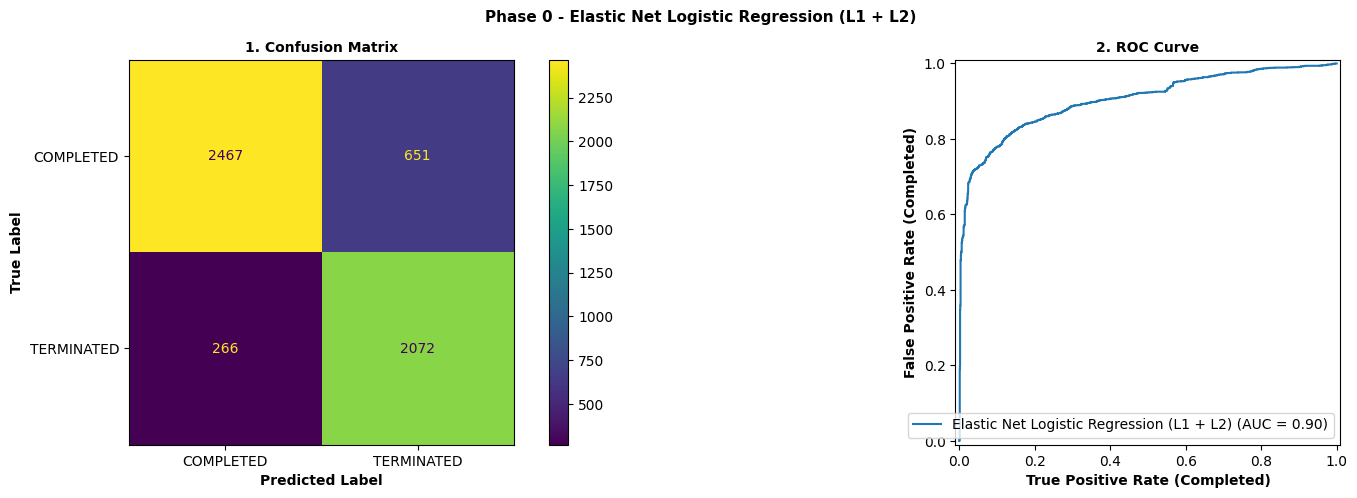

In [114]:
# Model
log_el = LogisticRegression(max_iter = 2000, random_state = 42, penalty = 'elasticnet', solver = "saga")   

# Hyperparameters CV
l1_ratio = np.linspace(0.1, 1, 10, endpoint = True) # l1_ratio = ratio between l1 and l2. l1_ratio = 1 = l1 / l1_ratio = 0 = l2 / 0 < l1_ratio < 1 = elastic net
param_grid = {"l1_ratio" : l1_ratio} 
log_el_model = GridSearchCV(log_el , param_grid = param_grid)

# Final Model
log_l2_model = log_el_model.fit(X_train0, y_train0)
display(f'Best Parameter l1_ratio : {log_el_model.best_params_}')

# y_pred
y_pred_log_el = log_el_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, log_el_model, X_test0, y_test0, y_pred_log_el, "Elastic Net Logistic Regression (L1 + L2)")

### 3. LDA - Linear Discriminant Analysis

Model : Phase 0 - Linear Discriminant Analysis (LDA)

a).
Accuracy Score : (True P + True N) / N total :
83.39%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.93      0.77      0.84      3118
  TERMINATED       0.75      0.92      0.83      2338

    accuracy                           0.83      5456
   macro avg       0.84      0.84      0.83      5456
weighted avg       0.85      0.83      0.83      5456


c).
Plots :


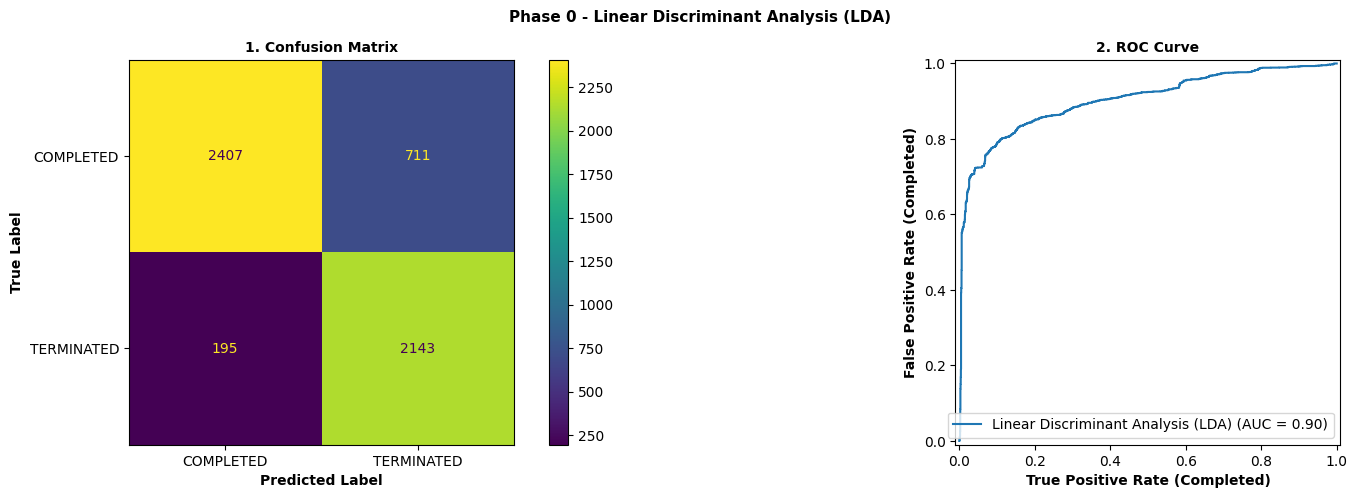

In [115]:
# Model
lda = LDA(store_covariance = True, solver = 'lsqr')

# Hyperparameters CV --> Always Chooses the lowest (e.g 0.001). Thus, do not use cv for computational efficacy./ # Use solver = lsqr if cv needed.
#shrinkage = np.linspace(0.001, 1, 10) 
#param_grid = {"shrinkage" : shrinkage} 
#lda_model = GridSearchCV(lda_model , param_grid = param_grid)

# Final Model
#display(f'Best Parameter shrinkage : {lda_model.best_params_}')

# Final model
lda_model = lda.fit(X_train0, y_train0)

# y_pred
y_pred_lda = lda_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, lda_model, X_test0, y_test0, y_pred_lda, "Linear Discriminant Analysis (LDA)")


### 4. QDA - Quantratic Discriminant Analysis

Model : Phase 0 - Quantric Discriminant Analysis (QDA)

a).
Accuracy Score : (True P + True N) / N total :
87.68%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.93      0.85      0.89      3118
  TERMINATED       0.82      0.91      0.86      2338

    accuracy                           0.88      5456
   macro avg       0.87      0.88      0.88      5456
weighted avg       0.88      0.88      0.88      5456


c).
Plots :


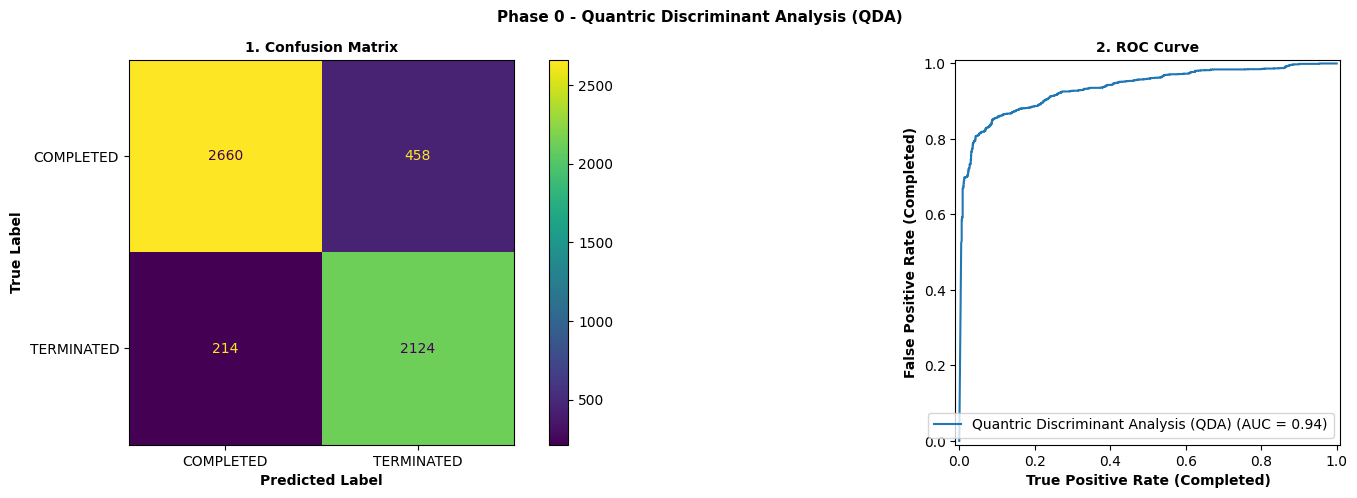

In [116]:
# Model
qda = QDA(store_covariance =True)
qda_model = qda.fit(X_train0, y_train0)

# y_pred
y_pred_qda = qda_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, qda_model, X_test0, y_test0, y_pred_qda, "Quantric Discriminant Analysis (QDA)")

### 5. Naive Bayes

Model : Phase 0 - Naive Bayes Classifier

a).
Accuracy Score : (True P + True N) / N total :
71.44%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.89      0.57      0.70      3118
  TERMINATED       0.61      0.91      0.73      2338

    accuracy                           0.71      5456
   macro avg       0.75      0.74      0.71      5456
weighted avg       0.77      0.71      0.71      5456


c).
Plots :


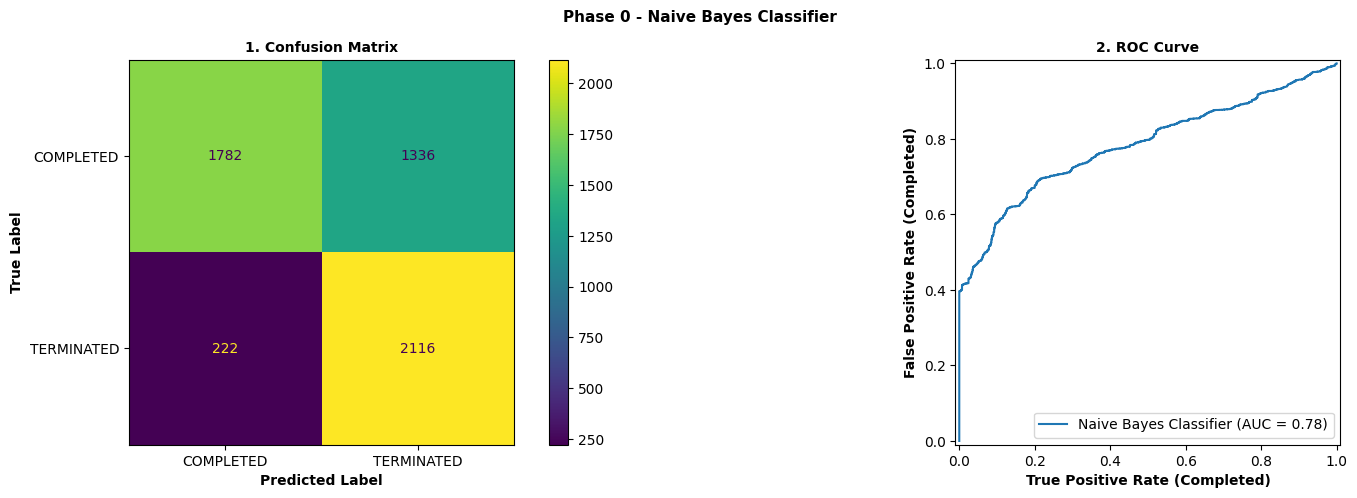

In [117]:
# Model
nb = BernoulliNB()  
nb_model = nb.fit(X_train0, y_train0)

# y_pred
y_pred_nb = nb_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, nb_model, X_test0, y_test0, y_pred_nb, "Naive Bayes Classifier")

## B) ML Classification

### 1. KNN - K Nearest Neighbors

"Best Parameter n_neighbors : {'n_neighbors': 1}"

Model : Phase 0 - K-Nearest Neighbors Classifier (KNN)

a).
Accuracy Score : (True P + True N) / N total :
99.29%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.99      0.99      0.99      3118
  TERMINATED       0.99      0.99      0.99      2338

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456


c).
Plots :


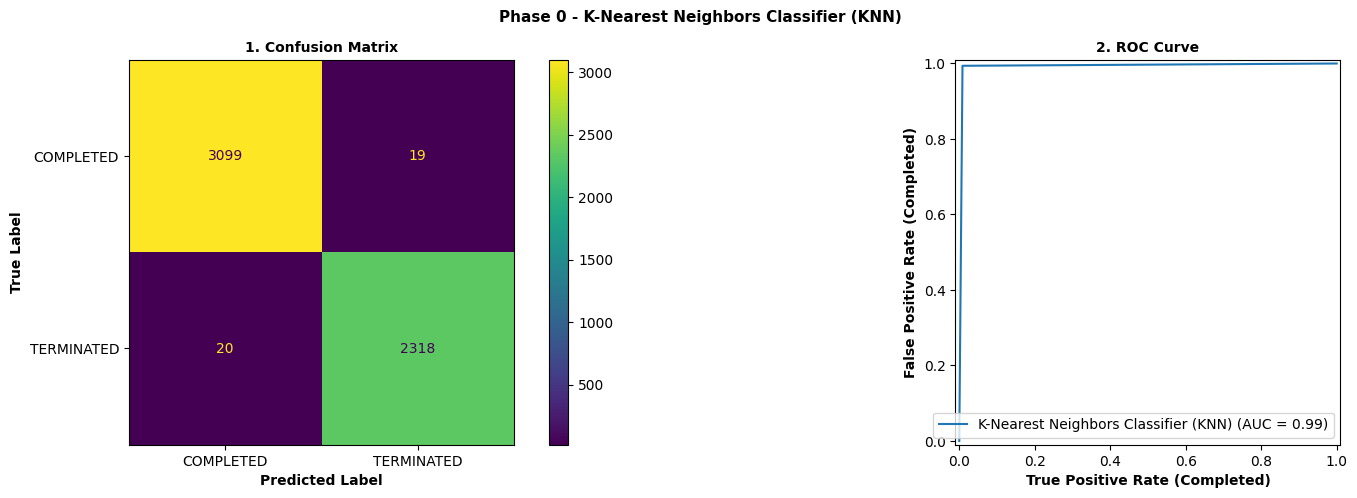

In [118]:
# Model
knn = KNeighborsClassifier()

# Hyperparameters CV
n_neighbors = np.linspace(1, 100, 100, endpoint = True).astype(int) 
param_grid = {"n_neighbors" : n_neighbors} 

# CV
knn_model = GridSearchCV(knn , param_grid = param_grid)

# Final Model
knn_model = knn_model.fit(X_train0, y_train0)
display(f'Best Parameter n_neighbors : {knn_model.best_params_}')

# y_pred
y_pred_knn = knn_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, knn_model, X_test0, y_test0, y_pred_knn, "K-Nearest Neighbors Classifier (KNN)")

### 2. SVC - Support Vector Classifier

"Best Parameter kernel: {'kernel': 'rbf'}"

Model : Phase 0 - Support Vector Classifier (SVC)

a).
Accuracy Score : (True P + True N) / N total :
93.68%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.98      0.91      0.94      3118
  TERMINATED       0.89      0.98      0.93      2338

    accuracy                           0.94      5456
   macro avg       0.93      0.94      0.94      5456
weighted avg       0.94      0.94      0.94      5456


c).
Plots :


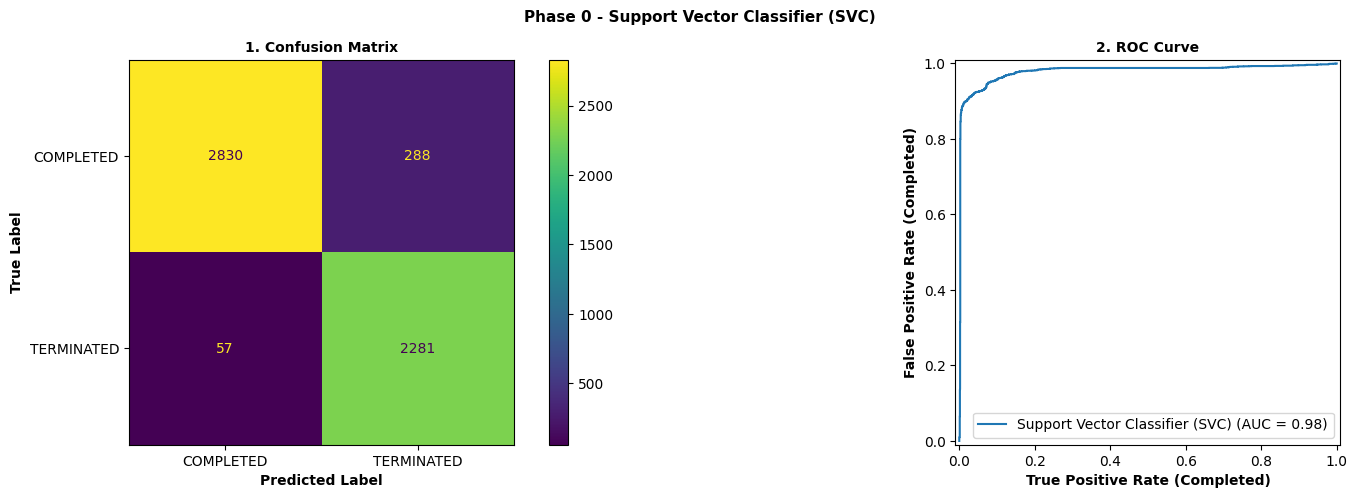

In [119]:
# Model
svc = SVC(random_state = 42)

# Hyperparameters CV
kernel = ["linear", "rbf", "sigmoid"] # "poly" --> takes too long with degree --> did not check for that.
# degree = [2,3] # Only for poly kernel
param_grid = {"kernel" : kernel} 

# CV
svc_model = GridSearchCV(svc , param_grid = param_grid)

# Final Model
svc_model = svc_model.fit(X_train0, y_train0)
display(f'Best Parameter kernel: {svc_model.best_params_}')

# y_pred
y_pred_svc = svc_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, svc_model, X_test0, y_test0, y_pred_svc, "Support Vector Classifier (SVC)")

### 3. Tree

"Best Parameter criterion/max_depth: {'criterion': 'gini', 'max_depth': 30}"

Model : Phase 0 - Pruned Decision Tree Classifier

a).
Accuracy Score : (True P + True N) / N total :
99.87%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       1.00      1.00      1.00      3118
  TERMINATED       1.00      1.00      1.00      2338

    accuracy                           1.00      5456
   macro avg       1.00      1.00      1.00      5456
weighted avg       1.00      1.00      1.00      5456


c).
Plots :


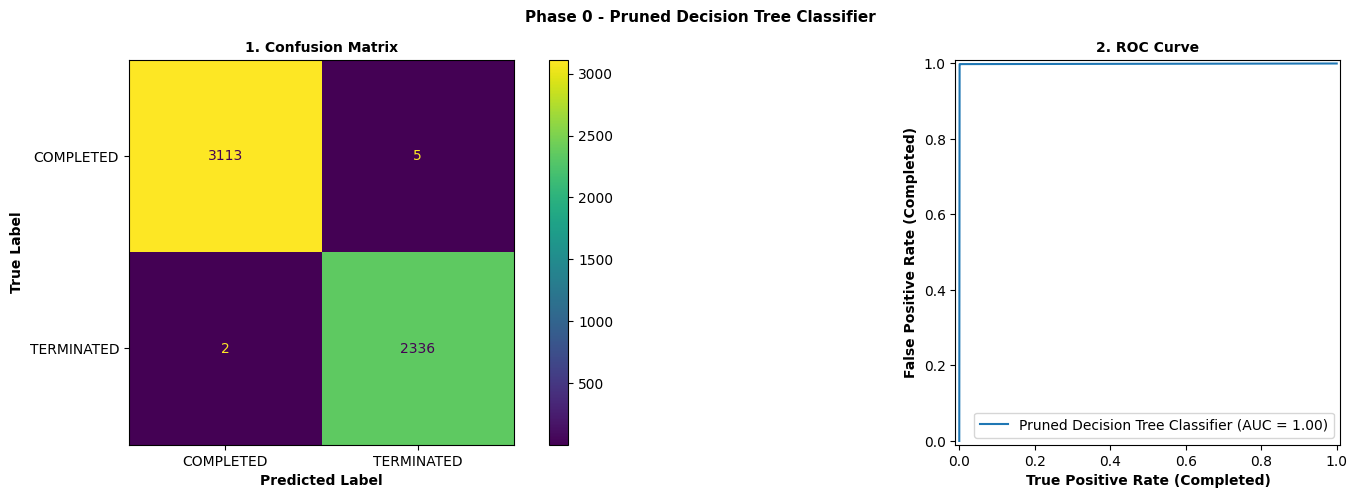

In [120]:
# Model
tree = DecisionTreeClassifier(random_state = 42)

# Hyperparameters CV
criterion = ['gini', 'entropy', 'log_loss']
max_depth = np.linspace(1, 100, 100, endpoint = True).astype(int) 
param_grid = {"criterion" : criterion, "max_depth" : max_depth} 

# CV
tree_model = GridSearchCV(tree , param_grid = param_grid)

# Final Model
tree_model = tree_model.fit(X_train0, y_train0)
display(f'Best Parameter criterion/max_depth: {tree_model.best_params_}')

# y_pred
y_pred_tree_prune = tree_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, tree_model, X_test0, y_test0, y_pred_tree_prune, "Pruned Decision Tree Classifier")


### 4. Random Forest

"Best Parameter criterion/bootstrap/n_estimators : {'bootstrap': True, 'criterion': 'entropy', 'max_features': None}"

Model : Phase 0 - Random Forest Classifier

a).
Accuracy Score : (True P + True N) / N total :
99.89%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       1.00      1.00      1.00      3118
  TERMINATED       1.00      1.00      1.00      2338

    accuracy                           1.00      5456
   macro avg       1.00      1.00      1.00      5456
weighted avg       1.00      1.00      1.00      5456


c).
Plots :


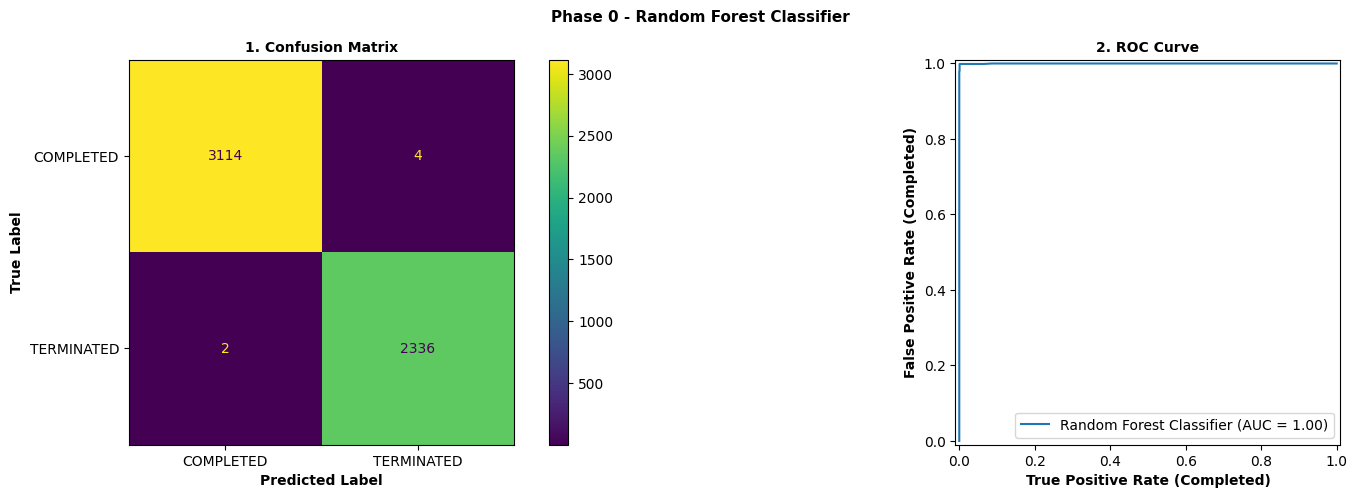

In [121]:
# Model
forest = RandomForestClassifier(random_state = 42)

# Hyperparameters
criterion = ['gini', 'entropy', 'log_loss']
bootstrap = [True, False] # Bootstrap samples when building trees. If False, the whole dataset is used to build each tree.
max_features = ["sqrt", "log2", None]  # None = m = p = Bagging Random Forest. / sqrt = m = sqrt(p) = Classic Random Forest. / log2 = m = log2(p) = Other Random Forest.
param_grid = {"criterion" : criterion, "bootstrap" : bootstrap, "max_features" : max_features} 

# CV
forest_model = GridSearchCV(forest , param_grid = param_grid)

# Final Model
forest_model = forest_model.fit(X_train0, y_train0)
display(f'Best Parameter criterion/bootstrap/n_estimators : {forest_model.best_params_}')

# y_pred
y_pred_forest = forest_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, forest_model, X_test0, y_test0, y_pred_forest, "Random Forest Classifier")


### 5. Gradient Boosting Classifier

"Best Parameter learning_rate : {'learning_rate': 1.12}"

Model : Phase 0 - Gradient Boosting Classifier

a).
Accuracy Score : (True P + True N) / N total :
98.08%

b).
Classification Report :
              precision    recall  f1-score   support

   COMPLETED       0.99      0.98      0.98      3118
  TERMINATED       0.97      0.98      0.98      2338

    accuracy                           0.98      5456
   macro avg       0.98      0.98      0.98      5456
weighted avg       0.98      0.98      0.98      5456


c).
Plots :


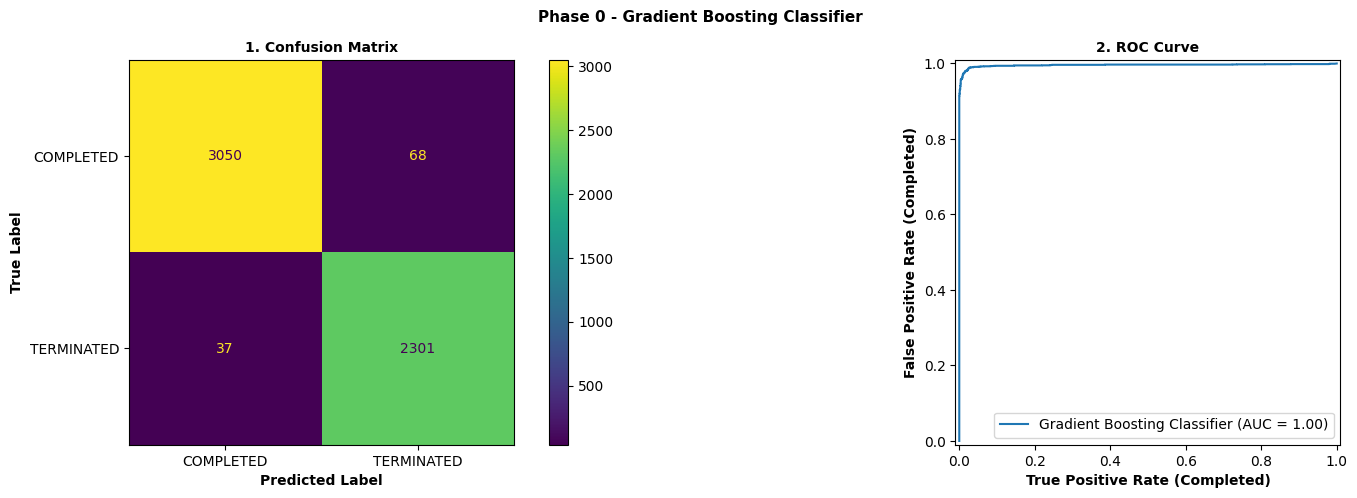

In [122]:
# Model
gra_boost = GradientBoostingClassifier(random_state = 42)  

# Hyperparameters
learning_rate = np.linspace(0.01, 10, 10, endpoint = True) 
# n_estimators = np.linspace(1000, 10000, 10, endpoint = True).astype(int) # Number of boosting stages to be run. Default = 100.
param_grid = {"learning_rate" : learning_rate} # , "n_estimators" : n_estimators}

# CV
gra_boost_model = GridSearchCV(gra_boost , param_grid = param_grid)

# Final Model
gra_boost_model = gra_boost_model.fit(X_train0, y_train0)
display(f'Best Parameter learning_rate : {gra_boost_model.best_params_}')

# y_pred
y_pred_gra_boost = gra_boost_model.predict(X_test0)

# Accuracy Score
accuracy(df0, 0, gra_boost_model, X_test0, y_test0, y_pred_gra_boost, "Gradient Boosting Classifier")


# 4) ROC Curve

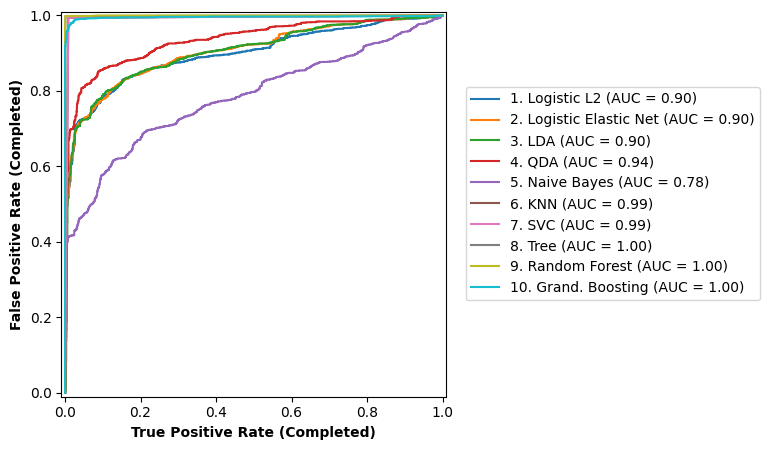

In [ ]:
models = [
    ("1. Logistic L2", log_model),
    ("2. Logistic Elastic Net", log_el_model),
    ("3. LDA", lda_model),
    ("4. QDA", qda_model),
    ("5. Naive Bayes", nb_model),
    ("6. KNN", knn_model),
    ("7. SVC", knn_model),
    ("8. Tree", tree_model),
    ("9. Random Forest", forest_model),
    ("10. Grand. Boosting", gra_boost_model)
]

fig = plt.figure(figsize=(20, 5))

for name, model in models:
    RocCurveDisplay.from_estimator(model, X_test0, y_test0, ax = plt.gca(), name = name, pos_label="COMPLETED")
    
plt.gca().set_xlabel("True Positive Rate (Completed)", fontsize = 10, fontweight = 'bold')
plt.gca().set_ylabel("False Positive Rate (Completed)", fontsize = 10, fontweight = 'bold')
plt.legend(loc = [1.05, 0.25])
plt.title("ROC Curve - All Models - Phase 0")